# image classification of fashion MNIST using fully connected network

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import sklearn
import pandas as pd

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## load fashion MNIST dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.  #min-max scaling
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## build model

In [7]:
#fully connected network (FCN) also known as multilayer perceptron (MLP).

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## compile model

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## train model

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7196 - accuracy: 0.7609 - val_loss: 0.5235 - val_accuracy: 0.8192
Epoch 2/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4943 - accuracy: 0.8285 - val_loss: 0.4681 - val_accuracy: 0.8400
Epoch 3/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4482 - accuracy: 0.8445 - val_loss: 0.4092 - val_accuracy: 0.8610
Epoch 4/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4178 - accuracy: 0.8535 - val_loss: 0.4062 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.3982 - accuracy: 0.8610 - val_loss: 0.3777 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3811 - accuracy: 0.8659 - val_loss: 0.3892 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3676 - accuracy: 0.8701 - val_loss: 0.3637 - val_ac

## learning curves

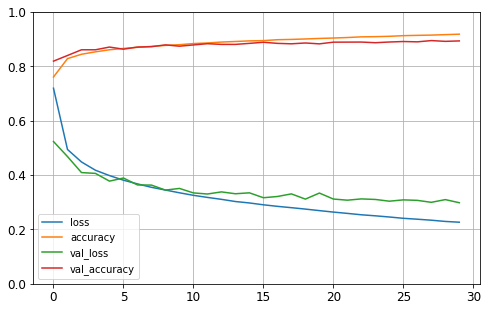

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
val_acc = history.history['val_accuracy']

In [14]:
np.argmax(val_acc) #epoch position of maximum; attention: position counted from zero; training output counted from one.

27

In [15]:
round(np.max(val_acc),4)

0.8948

## evaluate model

In [16]:
#check generalization accuracy on the test set

In [17]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.88 - 2s 5ms/step - loss: 0.3226 - accuracy: 0.8846


In [18]:
round(score[1],4)

0.8846

## prediction

In [24]:
X_new = X_test[:10]  #new instances taken from test set

In [25]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [26]:
y_test[:10]  #check prediction

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [27]:
np.array(class_names)[y_pred]  #convert class index to class name

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

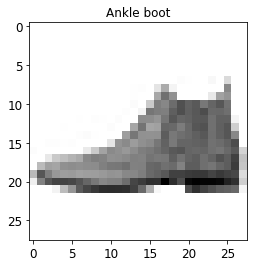

In [28]:
plt.imshow(X_new[0], cmap="binary", interpolation="nearest")
plt.title(class_names[y_test[0]], fontsize=12)
plt.show()